In [318]:
import requests
import os
import urllib.request
import pandas as pd
import seaborn as sns

In [319]:
#original github of 16S and Shotgun https://github.com/wbb121/IBD-data-analysis

In [320]:
#code of sc-PHENIX for computing a small size samples.
#you can use this code like mb-phenix
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform


def mb_PHENIX(data, umap_data, t=10,decay=15,metric='cosine',knn=10):
    
    print('calculando distancias eucle')
    
    distance_matrix =pdist(umap_data, metric)
    distance_matrix = (squareform(distance_matrix))
    D = distance_matrix
    
    print(distance_matrix.shape)
    print('done distance matrix')
    print('knn')

    print(' knn done')
    print(' afinity matrix')


    n,m =D.shape

    E = np.zeros((m,m))
    
    knn_dst = np.sort(distance_matrix, axis=1)
    

    epsilon = knn_dst[:,knn]
    
    
    pdx_scale = (distance_matrix / epsilon).T 
    
    E = np.exp(-1 * ( pdx_scale ** decay))
    
    print(' afinity matrix done')
    
    A = (E + E.T)
    
    diff_deg = np.diag(np.sum(A,0))
    
    
    diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)
    

    new_matrix =  np.linalg.matrix_power(diff_op, t)

    data_new = np.array(np.dot(new_matrix,data))

    return (Matix_impu)
     

In [321]:
#Install 
!pip install umap-learn magic-impute shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [322]:
import umap

In [323]:
url_genus_table_16S = 'https://raw.githubusercontent.com/wbb121/IBD-data-analysis/main/amplicon_tables/genus_table_rarefaction_100k.csv'

url_genus_table_shotgun = 'https://raw.githubusercontent.com/wbb121/IBD-data-analysis/main/shotgun_tables/shotgun_abundance_L6.txt'

metadata= 'https://raw.githubusercontent.com/wbb121/IBD-data-analysis/main/metadata.csv'

In [324]:
urllib.request.urlretrieve(url_genus_table_16S, 'table_16S.csv')
urllib.request.urlretrieve(url_genus_table_shotgun, 'table_shotgun.csv')
urllib.request.urlretrieve(metadata, 'metadata.csv')
os.listdir()
#!cd /content

['.config',
 'metadata.csv',
 'mb_PHENIX.py',
 'table_shotgun.csv',
 'table_16S.csv',
 '__pycache__',
 'sample_data']

In [325]:
metadata = pd.read_csv('/content/metadata.csv');metadata= metadata.iloc[:,1:]
table_16S = pd.read_csv('/content/table_16S.csv').set_index('Unnamed: 0').T
table_shotgun = pd.read_csv('/content/table_shotgun.csv',skiprows=1,sep='\t').T

#shared from the same sample based on the metadata among 16S and and shotgun
table_16S=table_16S.reset_index()
table_16S_ok= table_16S[table_16S['index'].isin(metadata['SampleID'])]
table_16S_ok.columns = table_16S_ok.columns.to_series().apply(lambda x: x.split(';')[5] if len(x.split(';')) > 4 else x)
table_16S_ok= table_16S_ok.set_index('index')

table_shotgun=table_shotgun.reset_index()
table_shotgun['index'] = table_shotgun['index'].str.replace('-', '.')
table_shotgun_ok= table_shotgun[table_shotgun['index'].isin(metadata['shotgun.SampleID'])]#['shotgun.SampleID'])]
table_shotgun_ok.columns = table_shotgun_ok.columns.to_series().apply(lambda x: x.split(';')[-1])
table_shotgun_ok = table_shotgun_ok.set_index('index')

#keep bouth matrices with the same id
table_16S_ok['index']= metadata.set_index('SampleID')['shotgun.SampleID']
table_16S_ok=table_16S_ok.set_index('index')

In [326]:
table_shotgun_ok

,g__Acidobacterium,g__Candidatus Koribacter,g__Acidimicrobium,g__Actinomyces,g__Actinotignum,g__Mobiluncus,g__Schaalia,g__Trueperella,g__Actinopolyspora,g__Bifidobacterium,...,g__Acholeplasma,g__Candidatus Phytoplasma,g__Entomoplasma,g__Mesoplasma,g__Spiroplasma,g__Mycoplasma,g__Thermotoga,g__NA,g__Opitutus,g__Akkermansia
index,,,,,,,,,,,,,,,,,,,,,
SM030818.1,0.000002,0.000000,0.000000,0.000036,0.000000,1.190000e-55,0.000000e+00,0.000000e+00,0.000000e+00,0.133664,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
SM030818.24,0.000000,0.000000,0.000000,0.000097,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.028811,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
SM030818.33,0.000000,0.000000,0.000000,0.000000,0.000000,3.179999e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000460,...,0.000000e+00,0.000000,0.000000,7.309998e-06,0.000000e+00,3.879999e-28,0.000000,0.000000,0.000000e+00,0.001678
SM030818.92,0.000000,0.000000,0.000000,0.000029,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.062603,...,3.129999e-46,0.000000,0.000000,0.000000e+00,0.000000e+00,4.619999e-05,0.000000,0.000000,0.000000e+00,0.000000
SM030818.97,0.000000,0.000000,0.000000,0.000135,0.000000,4.850001e-70,0.000000e+00,0.000000e+00,0.000000e+00,0.264674,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,2.420000e-154,0.000000,0.000000,0.000000e+00,0.000000
SM030818.99,0.000000,0.000000,0.000000,0.000000,0.000000,5.940000e-237,0.000000e+00,0.000000e+00,0.000000e+00,0.041166,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
SM030818.100,0.000000,0.000000,0.000000,0.000243,0.000000,0.000000e+00,2.479999e-19,0.000000e+00,0.000000e+00,0.000451,...,0.000000e+00,0.000083,0.000000,5.469999e-05,1.340000e-54,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
SM030818.101,0.000000,0.000000,0.000000,0.000073,0.000000,1.120000e-05,1.210000e-05,0.000000e+00,0.000000e+00,0.050411,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,6.619999e-62,0.000000,0.000000,0.000000e+00,0.000000
SM030818.102,0.000000,0.000000,0.000000,0.000119,0.000000,0.000000e+00,4.379999e-26,0.000000e+00,0.000000e+00,0.547730,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000


In [327]:
#mi generador de dropouts con semilla
def matrix_dropout (df, por_drop = 0.1,seed=42):
  if por_drop <1:
    shape= df.shape[0]*df.shape[1]
    zeros= shape*por_drop
    ones=  shape*( 1-por_drop)
    random_1 = np.array([])
    random_0 = np.array([])
    zeros = round(zeros) 
    ones = round(ones)
    random_0 = np.zeros(zeros) 
    random_1 = np.ones(ones)

    random_dropout = np.append(random_0,random_1)
    random_dropout = np.random.RandomState(seed=seed).permutation(random_dropout) # we use a permutation
    random_dropout = random_dropout.reshape(df.shape)
    
    noise_data = df / random_dropout 
    noise_data  = noise_data.replace([np.inf, -np.inf], np.nan)

    noise_data = noise_data.replace(np.nan, 0)
    noise_data    
    return noise_data
  else:
    print('must be a porcentance a number less than 1 and more than 0')

In [619]:

matrix_dropouted = matrix_dropout (table_shotgun_ok, por_drop = 0.8,seed=42)

<Axes: >

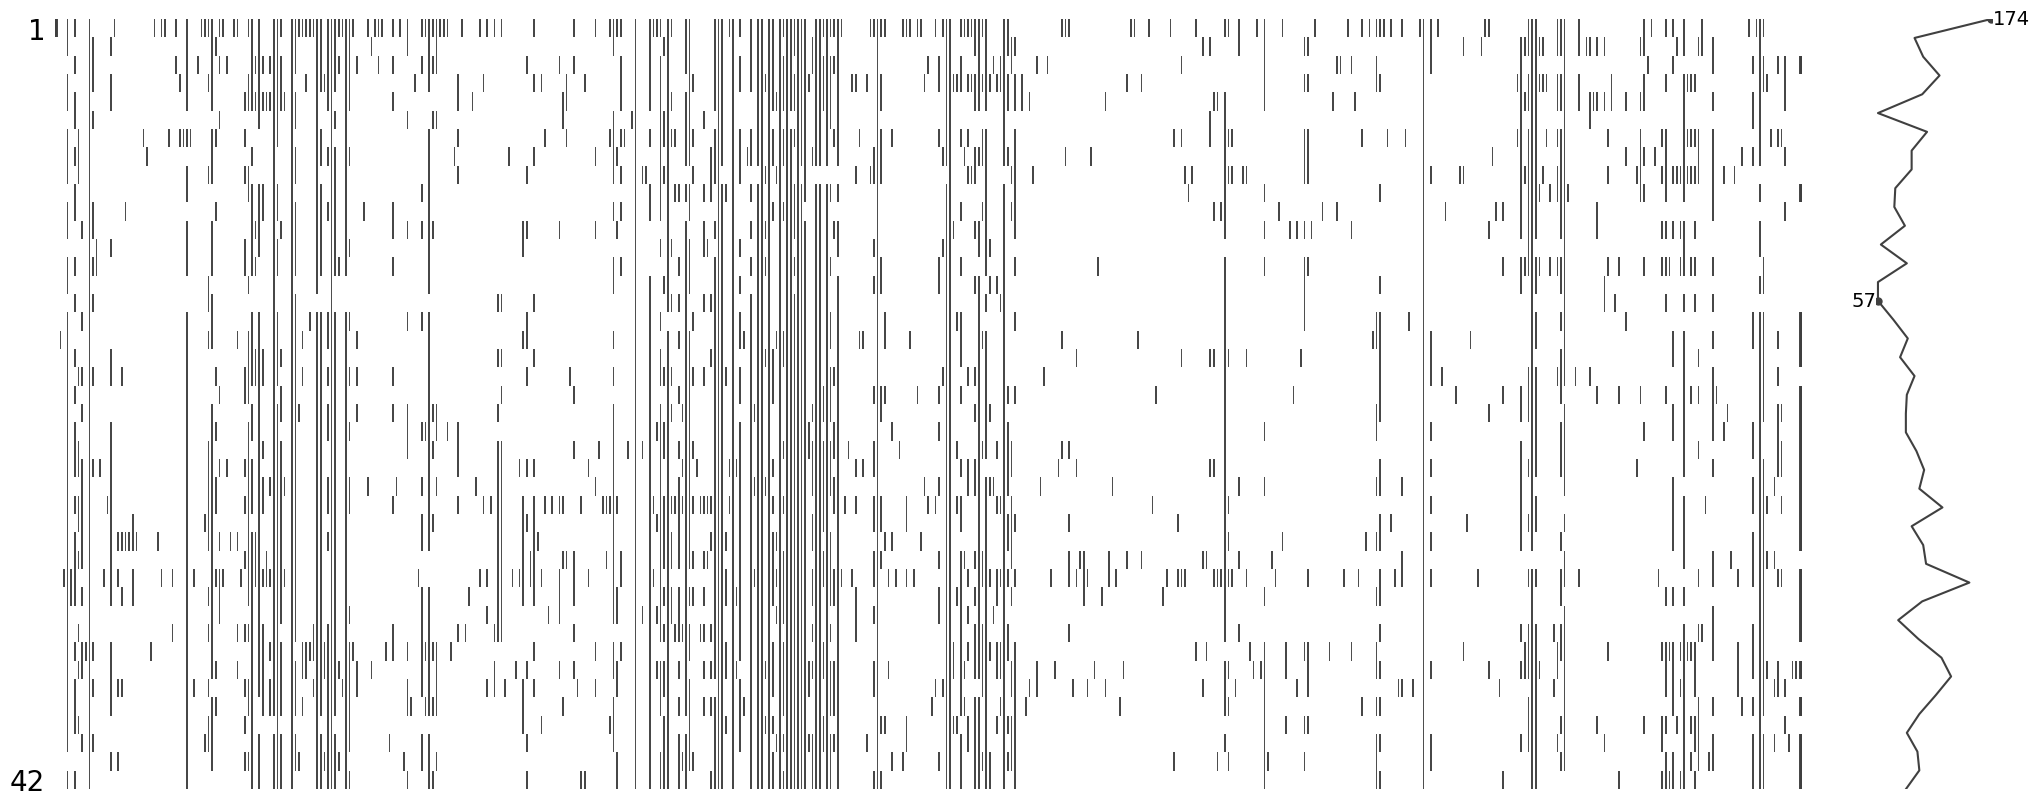

In [620]:
#ver folios duplicados pd.DataFrame(Poblaciones['Folio_PRONACE'].value_counts())
import missingno as msno
msno.matrix(table_shotgun_ok.replace(0,np.nan))

<Axes: >

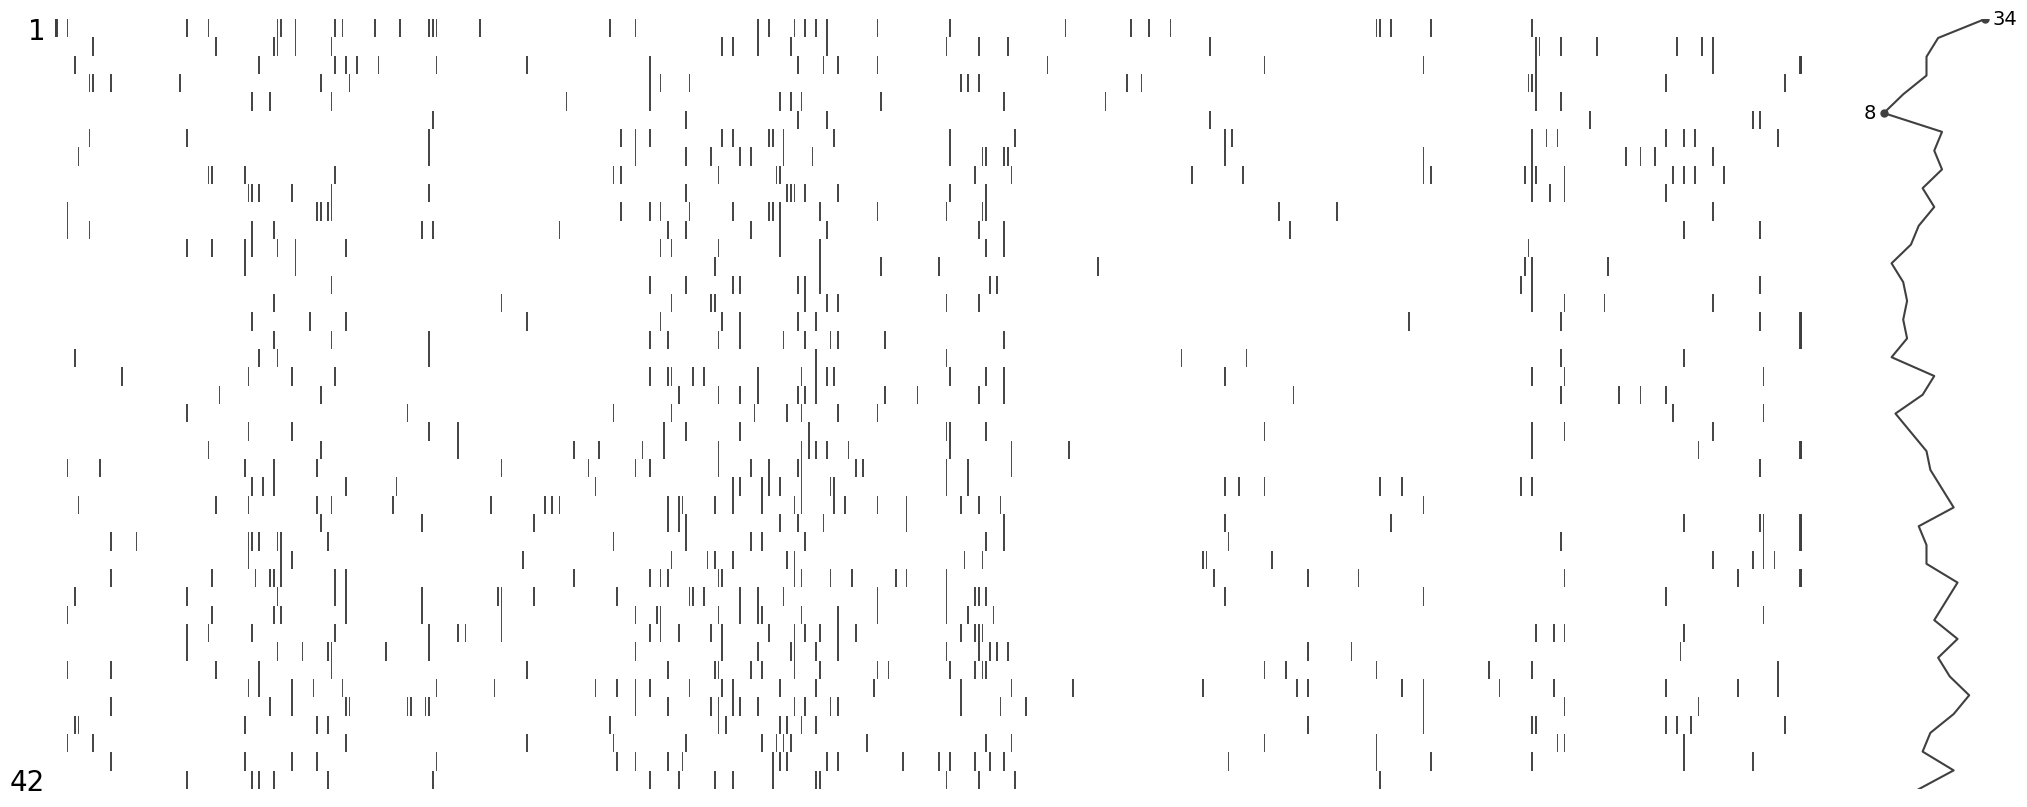

In [621]:
#ver folios duplicados pd.DataFrame(Poblaciones['Folio_PRONACE'].value_counts())
import missingno as msno
msno.matrix(matrix_dropouted.replace(0,np.nan))

In [635]:
umap_op = umap.UMAP(n_components=10, verbose=True,metric='euclidean',n_epochs=500,min_dist=0.1,
                    n_neighbors=30,random_state=1,target_weight=0.5)
data_umap_vis_super = umap_op.fit_transform(matrix_dropouted,T_16S_labels['SampleType'].replace( {'Healthy': 0, 'UC':1}))

UMAP(n_components=10, n_epochs=500, n_neighbors=30, random_state=1, verbose=True)
Tue Apr 18 23:05:19 2023 Construct fuzzy simplicial set
Tue Apr 18 23:05:19 2023 Finding Nearest Neighbors
Tue Apr 18 23:05:19 2023 Finished Nearest Neighbor Search
Tue Apr 18 23:05:19 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue Apr 18 23:05:20 2023 Finished embedding


In [636]:
imputed_ALL =mbPHENIX(matrix_dropouted, data_umap_vis_super, t=2,decay=500,metric='euclidean',knn=10)

calculando distancias
(42, 42)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue Apr 18 23:05:20 2023


overflow encountered in power


<Axes: >

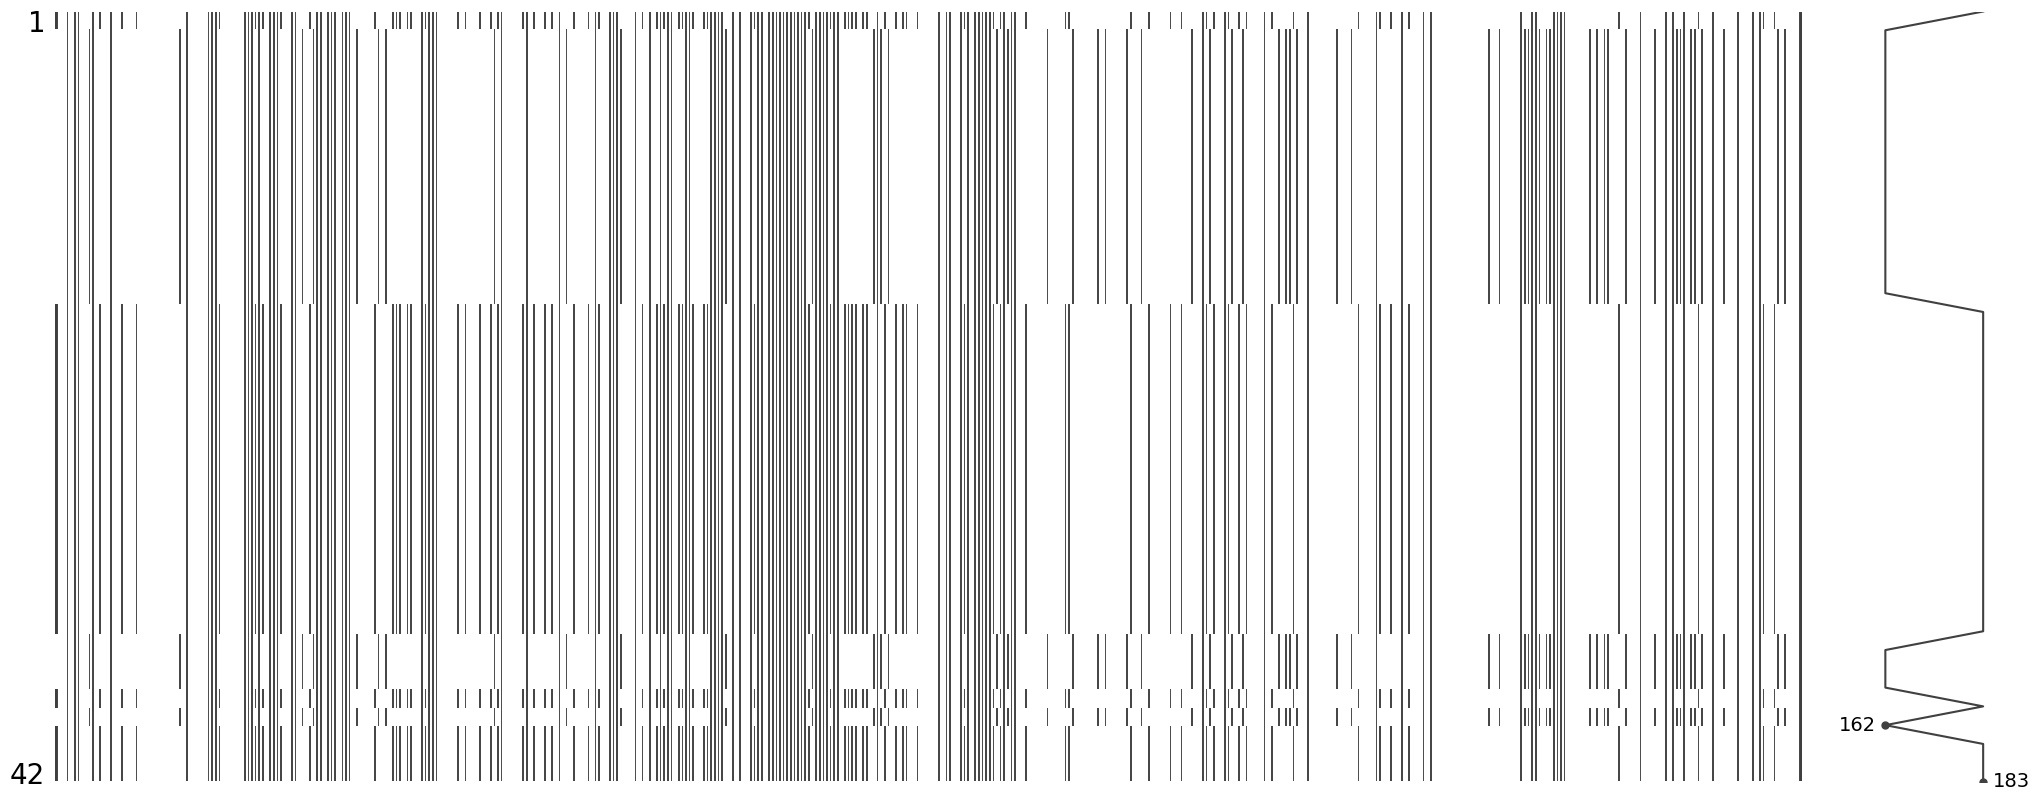

In [637]:
#ver folios duplicados pd.DataFrame(Poblaciones['Folio_PRONACE'].value_counts())
import missingno as msno
msno.matrix(imputed_ALL.replace(0,np.nan))

<Axes: >

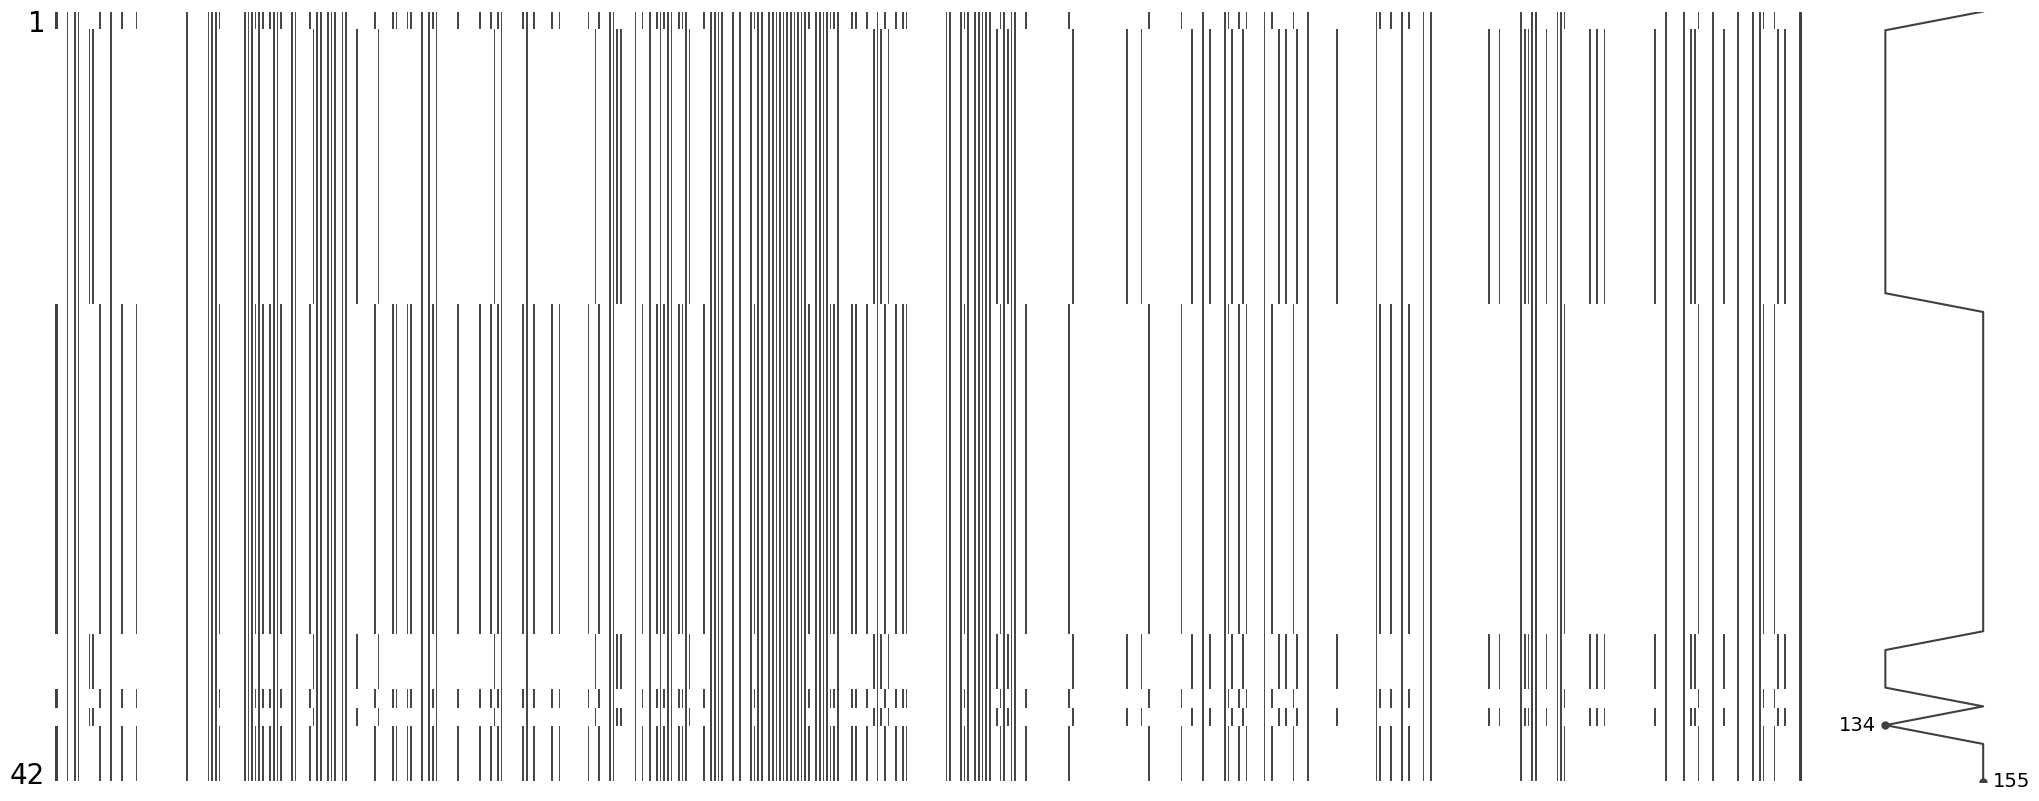

In [638]:
msno.matrix(imputed_ALL [imputed_ALL > 1e-9].replace(0,np.nan))

In [639]:
# calculate the correlation matrix between the two dataframes
corr_mat = np.corrcoef(table_shotgun_ok.values.flatten(), matrix_dropouted.values.flatten()).reshape((2,2))
corr_mat


array([[1.        , 0.34458824],
       [0.34458824, 1.        ]])

In [640]:
# calculate the correlation matrix between the two dataframes
corr_mat = np.corrcoef(table_shotgun_ok.values.flatten(), imputed_ALL.values.flatten()).reshape((2,2))
corr_mat


array([[1.        , 0.38022968],
       [0.38022968, 1.        ]])

In [641]:
df = pd.DataFrame()
df['mean_genus'] =table_shotgun_ok.mean()
df['zeros_porcentage']=table_shotgun_ok.replace(0,np.nan).isna().mean() * 100


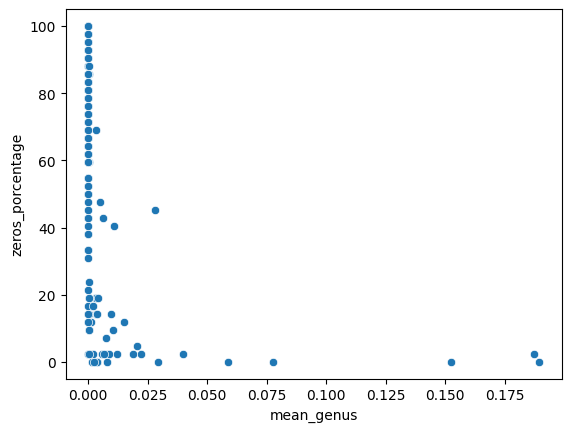

In [642]:
import seaborn as sns
import pandas as pd
import numpy as np

# create a sample dataframe

# create scatter plot
sns.scatterplot(x='mean_genus', y='zeros_porcentage', data=df)

# display the plot
plt.show()




`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



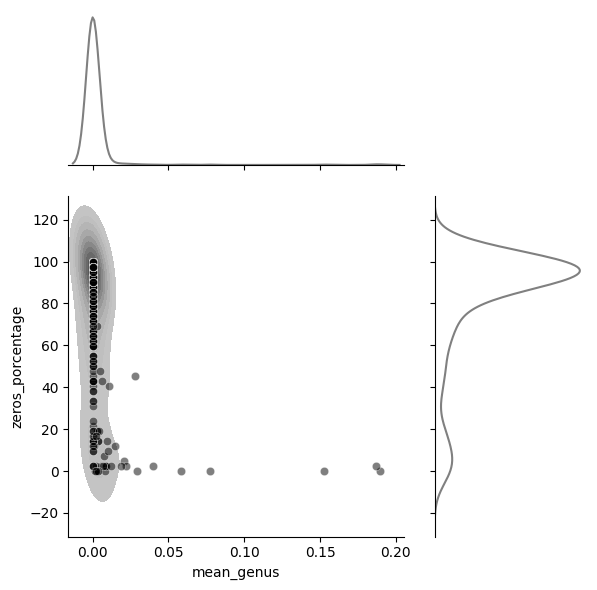

In [643]:

# create joint plot with scatter plot and kernel density estimate
jp = sns.jointplot(x='mean_genus', y='zeros_porcentage', data=df, kind='kde', height=6, ratio=2,joint_kws={'shade': True, 'color': 'grey'},marginal_kws={'color': 'grey'})

# overlay scatter plot on joint plot
jp.plot_joint(sns.scatterplot, color='black', alpha=0.5)

In [644]:
df = pd.DataFrame()
df['mean_genus'] =imputed_ALL [imputed_ALL > 1e-9].replace(np.nan,0).mean()
df['zeros_porcentage']=imputed_ALL [imputed_ALL > 1e-9].replace(np.nan,0).replace(0,np.nan).isna().mean() * 100


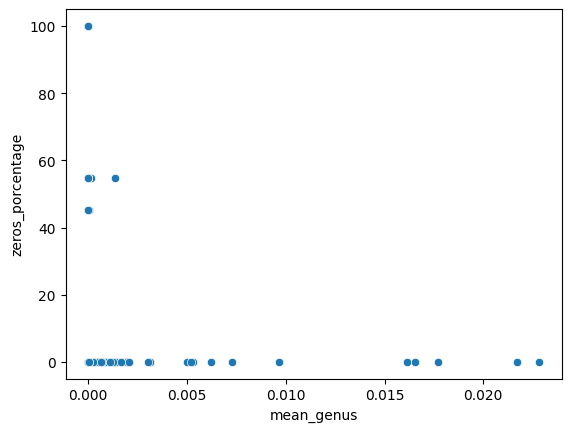

In [645]:
import seaborn as sns
import pandas as pd
import numpy as np

# create a sample dataframe

# create scatter plot
sns.scatterplot(x='mean_genus', y='zeros_porcentage', data=df)
# display the plot
plt.show()



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



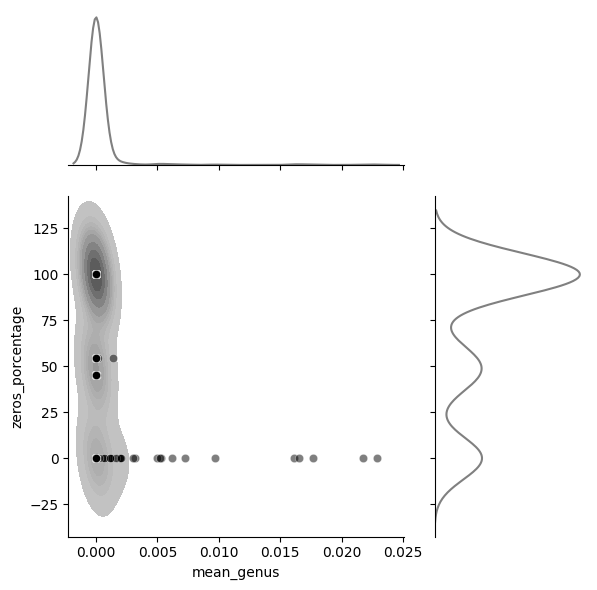

In [646]:

# create joint plot with scatter plot and kernel density estimate
jp = sns.jointplot(x='mean_genus', y='zeros_porcentage', data=df, kind='kde', height=6, ratio=2,joint_kws={'shade': True, 'color': 'grey'},marginal_kws={'color': 'grey'})
# overlay scatter plot on joint plot
jp.plot_joint(sns.scatterplot, color='black', alpha=0.5)

In [528]:
import numpy as np
comunes = np.intersect1d(table_16S_ok.columns, table_shotgun_ok.columns)

In [529]:
shotgun = table_shotgun_ok[comunes]
T_16S = table_16S_ok [comunes]

In [530]:
shotgun_labels = pd.DataFrame()
shotgun_labels['SampleType'] = metadata.set_index('shotgun.SampleID')['SampleType']

In [531]:
T_16S_labels = pd.DataFrame()
T_16S_labels['SampleType'] = metadata.set_index('shotgun.SampleID')['SampleType']

#Correlation analysis of by healty sample among technologies 16s vs shotgun with non-imputation

In [ ]:
shotgun_Healthy = shotgun[shotgun_labels['SampleType'] == 'Healthy']

In [ ]:
T_16S_Healthy = T_16S[T_16S_labels['SampleType'] == 'Healthy']

In [ ]:
""""
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12*2, 10*2)) # set the figure size
sns.heatmap(T_16S_Healthy.corr(), cmap='coolwarm', ax=ax)
"""

In [ ]:
"""
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12*2, 10*2)) # set the figure size
sns.heatmap(shotgun_Healthy.corr(), cmap='coolwarm', ax=ax)
"""

In [ ]:
T_16S_Healthy

In [ ]:
import numpy as np
import seaborn as sns

# create two dataframes
df1 = T_16S_Healthy.sort_index()
df2 = shotgun_Healthy.sort_index()

# calculate the correlation matrix between the two dataframes
corr_mat = np.corrcoef(df1.values.flatten(), df2.values.flatten()).reshape((2,2))
corr_mat


#**Microbiome data**

In [ ]:
url_mbphenix = 'https://raw.githubusercontent.com/resendislab/mb-PHENIX/main/CODE/mb-phenix%20code/mb_PHENIX.py'

In [ ]:
urllib.request.urlretrieve(url_mbphenix, 'mb_PHENIX.py')
os.listdir()
!cd /content

#**Import mb-PHENIX**

In [ ]:
from mb_PHENIX import mbPHENIX

#**imputation mb-PHENIX in a surpervised manner**
this is just like sc-phenix https://doi.org/10.1101/2022.06.09.495525

In [ ]:
umap_op = umap.UMAP(n_components=10, verbose=True,metric='euclidean',n_epochs=500,min_dist=0.1,
                    n_neighbors=30,random_state=1,target_weight=0.9)
data_umap_vis_super = umap_op.fit_transform(T_16S,T_16S_labels['SampleType'].replace( {'Healthy': 0, 'UC':1}))

In [ ]:
imputed_ALL =mbPHENIX(T_16S, data_umap_vis_super, t=3,decay=15,metric='euclidean',knn=11)

In [ ]:
umap_op = umap.UMAP(n_components=2, verbose=True,metric='euclidean',n_epochs=500,min_dist=0.1,
                    n_neighbors=30,random_state=1)
data_umap_vis_super = umap_op.fit_transform(imputed_ALL)

In [ ]:
import plotly.express as px

fig = px.scatter(data_umap_vis_super, x=0, y=1, color= T_16S_labels['SampleType'])

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'
    
})
fig.update_traces(marker=dict(size=5))
fig.show()

In [ ]:
umap_op = umap.UMAP(n_components=2, verbose=True,metric='euclidean',n_epochs=500,min_dist=0.1,
                    n_neighbors=30,random_state=1,target_weight=0.5)
data_umap_vis_super = umap_op.fit_transform(T_16S)



In [ ]:
import plotly.express as px

fig = px.scatter(data_umap_vis_super, x=0, y=1, color= T_16S_labels['SampleType'])

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'
    
})
fig.update_traces(marker=dict(size=5))
fig.show()


import xgboost as xgb


In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier()
import shap
explainer = shap.TreeExplainer(clf.fit(T_16S,
                                       T_16S_labels['SampleType'].replace( {'Healthy': 0, 'UC':1})))
shap_values = explainer.shap_values(T_16S)

In [ ]:
umap_op = umap.UMAP(n_components=2, verbose=True,metric='euclidean',n_epochs=500,min_dist=0.1,
                    n_neighbors=30,random_state=1)
umap_super_shap = umap_op.fit_transform(shap_values)

In [ ]:
imputed_ALL =mbPHENIX(T_16S, umap_super_shap, t=3,decay=15,metric='euclidean',knn=15)

In [ ]:
umap_op = umap.UMAP(n_components=2, verbose=True,metric='euclidean',n_epochs=500,min_dist=0.1,
                    n_neighbors=30,random_state=1,target_weight=0.5)
data_umap_vis_super = umap_op.fit_transform(imputed_ALL)


In [ ]:
import plotly.express as px

fig = px.scatter(data_umap_vis_super, x=0, y=1, color= T_16S_labels['SampleType'])

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'
    
})
fig.update_traces(marker=dict(size=5))
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(data_umap_vis_super, x=0, y=1, color= imputed_ALL.g__Anaerococcus)

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'
    
})
fig.update_traces(marker=dict(size=5))
fig.show()

In [ ]:

fig = px.scatter(data_umap_vis_super, x=0, y=1, color= T_16S.g__Anaerococcus)

fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)'
    
})
fig.update_traces(marker=dict(size=5))
fig.show()

In [ ]:
import numpy as np
import seaborn as sns



# create two dataframes
df1 = imputed_ALL[T_16S_labels['SampleType'] == 'Healthy'].sort_index()
df2 =  shotgun_Healthy.sort_index()

# calculate the correlation matrix between the two dataframes
corr_mat = np.corrcoef(df1.values.flatten(), df2.values.flatten()).reshape((2,2))
corr_mat

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12*2, 10*2)) # set the figure size
sns.heatmap(df1.corr(), cmap='coolwarm', ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(12*2, 10*2)) # set the figure size
sns.heatmap(df2.corr(), cmap='coolwarm', ax=ax)

In [ ]:
import scprep
import seaborn as sns
imp_all = scprep.select.highly_variable_genes(imputed_ALL,percentile=80)
# heatmap labels
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

#**imputation mb-PHENIX in a UNsurpervised manner** just like sc-phenix

In [ ]:
umap_op = umap.UMAP(n_components=10, verbose=True,metric='cosine',n_epochs=500,min_dist=0.5,n_neighbors=200,random_state=1,)
data_umap_vis_unsuper = umap_op.fit_transform(complement_asvstable)

In [ ]:
imputed_ALL_unsuper =mbPHENIX(complement_asvstable, data_umap_vis_unsuper, t=5,decay=1,metric='euclidean',knn=10)

In [ ]:
imp_all = scprep.select.highly_variable_genes(imputed_ALL_unsuper,percentile=80)
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

#*Non-imputed data distribution by status clusters*





In [ ]:
complement_asvstable

In [ ]:
dataframe_noimp =  complement_asvstable.copy()


In [ ]:
dataframe_noimp

In [ ]:
dataframe_noimp.to_csv('TD2.csv')

In [ ]:
name_1 = 'Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Akkermansia'

In [ ]:
sample_data_1

In [ ]:
dataframe_noimp['status']= sample_data_1['status']

In [ ]:
dataframe_noimp.columns[50]

In [ ]:
dataframe_noimp

In [ ]:
#name_1="Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes"

In [ ]:
sns.displot(dataframe_noimp, x=name_1, hue="status", kind="kde", fill=True,height=8, aspect=1)

In [ ]:
imp_all = scprep.select.highly_variable_genes(complement_asvstable,percentile=80)
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

#*Unsupervised imputed data distribution by status clusters (UMAP non supervised) for mb-phenix* 

In [ ]:
imputed_ALL_unsuper

In [ ]:
dataframe_imp_super=  imputed_ALL_unsuper.copy()

In [ ]:
dataframe_imp_super['status']= sample_data_1['status']

In [ ]:
import scprep
#z_score=1
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

imp_dataframe_imp_super = scprep.select.highly_variable_genes(imputed_ALL_unsuper,percentile=80)
ax = sns.clustermap(imp_dataframe_imp_super.iloc[:,:],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(20, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

In [ ]:
b= sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=False,height=8, aspect=1)
#b.set(xlim=(0.005, 37))

In [ ]:
b= sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=False)
#b.set(xlim=())

MAGIC

In [ ]:
import magic
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(complement_asvstable)

In [ ]:
dataframe_imp_MAGIC=  X_magic.copy()
dataframe_imp_MAGIC['status']= sample_data_1['status']

In [ ]:
import scprep
#z_score=1
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

imp_all = scprep.select.highly_variable_genes(X_magic,percentile=80)
ax = sns.clustermap(imp_all.iloc[:,:],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(20, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

In [ ]:
X_magic

In [ ]:
name_1= "Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Akkermansia"
b= sns.displot(dataframe_imp_MAGIC, x=name_1, hue="status", kind="kde", fill=True,log_scale=False,height=8, aspect=1)
#b.set(xlim=())

#*Superviced imputed data distribution by status clusters*

In [ ]:
imputed_ALL

In [ ]:
dataframe_imp_super=  imputed_ALL.copy()
dataframe_imp_super['status']= sample_data_1['status']

In [ ]:
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,height=8, aspect=1)
a.set(xlim=(2000, 9000))

In [ ]:
#name_1="Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia"
#import seaborn as sns
#a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=1)
#a.set(xlim=(2000, 9000))

In [ ]:
name_1="Bacteria;Firmicutes;Negativicutes;Selenomonadales;Veillonellaceae;Anaerovibrio"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=1)
a.set(yticklabels=[])

a.set(xlim=(2000, 9000))

In [ ]:
name_1="Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Anaerostipes"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=1)
a.set(yticklabels=[])

In [ ]:
name_1="Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Escherichia.Shigella"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=1)
a.set(xticklabels=[])
a.set(yticklabels=[])


In [ ]:
name_1= "Bacteria;Firmicutes;Clostridia;Clostridiales;Peptostreptococcaceae;Romboutsia"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

In [ ]:
name_1= "Bacteria;Firmicutes;Bacilli;Lactobacillales;Enterococcaceae;Enterococcus"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

In [ ]:
name_1 = "Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes"
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

In [ ]:
name_1 = "Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcaceae_UCG.005"
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

In [ ]:
name_1 = "Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcaceae_UCG.003"
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

In [ ]:
name_1 = "Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcaceae_UCG.005"
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

In [ ]:
name_1 = "Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Roseburia"
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True,aspect=3)
a.set(yticklabels=[])

In [ ]:
!pip install scprep
import scprep
x=scprep.stats.differential_expression_by_cluster(dataframe_imp_super.iloc[:,:-1], sample_data_4umap, measure='emd', direction='both', gene_names=None, n_jobs=-2)

In [ ]:
#clasesdic={"healthy":0,"IFG":1,"IGT":2,"IFG+IGT":3,"T2D":4,"T2D_treated":5}
emd = pd.DataFrame([       x[0]['emd'].rename('healthy'),      x[1]['emd'].rename('IFG'),
               x[2]['emd'].rename('IGT')  , x[3]['emd'].rename('IFG+IG') ,
                 x[4]['emd'].rename('T2D') ,  x[5]['emd'].rename('T2D_treated')])

In [ ]:
c= pd.DataFrame()
#c['Akkermansia'] = emd['Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Verrucomicrobiaceae;Akkermansia']

In [ ]:
imp_all = scprep.select.highly_variable_genes(imputed_ALL,percentile=80)

In [ ]:
ax = sns.clustermap(imp_all.iloc[:,:],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=True,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(20, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

In [ ]:
import seaborn as sns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True)
a.set(xlim=(2000, 9000))

In [ ]:
name_1 = 'Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Alcaligenaceae;Achromobacter'

dataframe_imp_super.columns
a = sns.displot(dataframe_imp_super, x=name_1, hue="status", kind="kde", fill=True,log_scale=True)
a.set(xlim=(0.1, 6))

**Install dependencies for Heatmap**

In [ ]:
imp_all = scprep.select.highly_variable_genes(imputed_ALL,percentile=80)

In [ ]:
#z_score=1
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

In [ ]:
imp_all = scprep.select.highly_variable_genes(imputed_ALL_unsuper,percentile=80)

In [ ]:
#z_score=1
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

In [ ]:
#z_score=1

imp_all = scprep.select.highly_variable_genes(complement_asvstable,percentile=80)
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))

##**Try Different target_ weight values**

In [ ]:
target_weight= 0.9


umap_op = umap.UMAP(n_components=10, verbose=True,metric='cosine',n_epochs=10000,min_dist=0.1,
                    n_neighbors=200,random_state=1,target_weight=target_weight)
data_umap_vis_super = umap_op.fit_transform(complement_asvstable,sample_data_4umap)

In [ ]:
imputed_ALL_unsuper =mbPHENIX(complement_asvstable, data_umap_vis_super, t=5,decay=1,metric='euclidean',knn=10)

In [ ]:
imp_all = scprep.select.highly_variable_genes(imputed_ALL_unsuper,percentile=80)

In [ ]:
#z_score=1
imp_all = scprep.select.highly_variable_genes(imputed_ALL_unsuper,percentile=80)
import seaborn as sns
# Etiquetas para heatmaps
labels_umap_=sample_data
lol= sns.color_palette('pastel')
lut = dict(zip(labels_umap_.unique(), lol))
row_colors = labels_umap_.map(lut)

ax = sns.clustermap(imp_all.iloc[:,:100],row_colors=row_colors.to_numpy(),yticklabels=False,xticklabels=False,col_cluster=True,row_cluster=True,cmap="GnBu",figsize=(10, 6),dendrogram_ratio=0.1,standard_scale=1
                    ,cbar_pos=(1, 0.8, 0.05, 0.18))